# ENSf 611 Project - Housing Data Regression

Sam Rainbow (UCID 30084292)

### 1. Load and Analyze data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the training data
df_train = pd.read_csv('train.csv', na_values = 'NA')

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Lets look at the potential features in the data set.
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# Inspect the predicted label
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The data appears to not have any major outliers in the predicted label with a max of 755k and min of 35k.

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

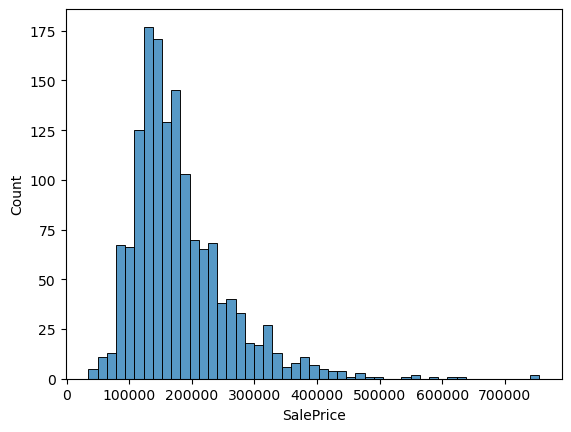

In [12]:
# Lets look at the distribution of the predicted label
sns.histplot(df_train['SalePrice'])

We can see that the data is normally distributed which is a positive characteristic of the data for linear regression.

C:\Users\sammr\AppData\Local\Temp\ipykernel_39916\3045151586.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


<AxesSubplot: >

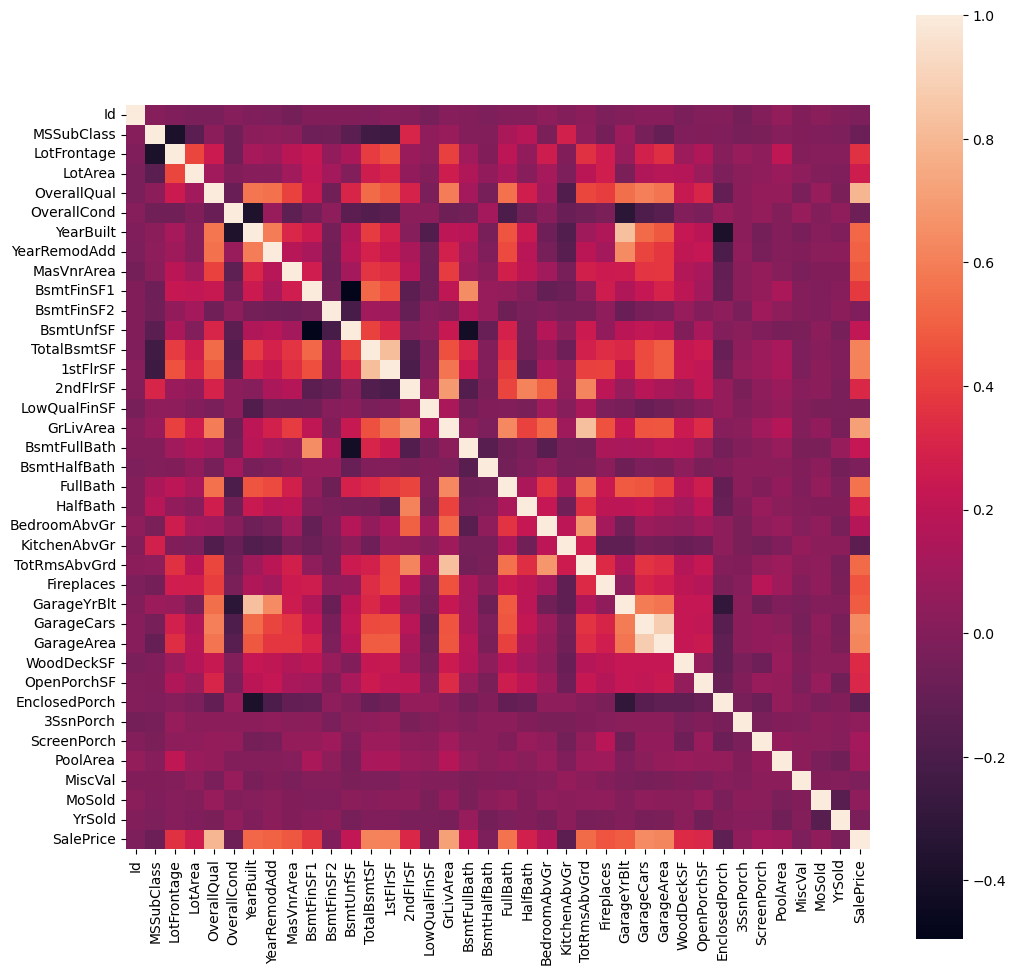

In [16]:
#Lets see which quantitative features are correlated with the predicted label using a correlation matrix.
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, square=True)

We can see above that in the bottom row representing Sale Price (target variabel) that OverallQuality, Gross Living Area, GarageArea, and GarageCars seem to be strongly correlated with saleprice and could indicate potential features that will be useful in our model.
Lets look a little closer at the top 10 features.

C:\Users\sammr\AppData\Local\Temp\ipykernel_39916\498545658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


<AxesSubplot: >

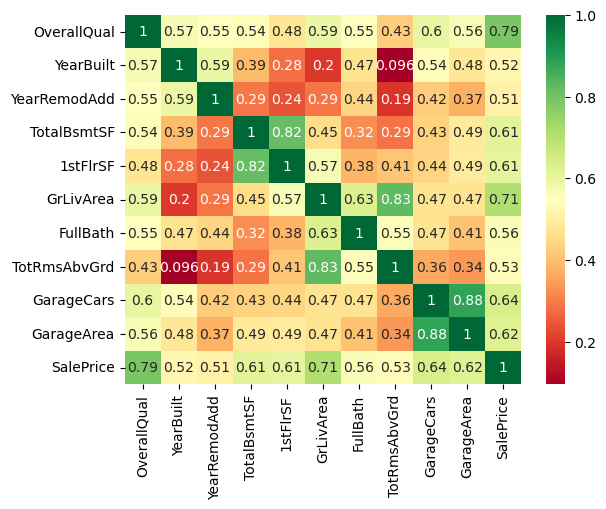

In [23]:
# Create a correlation matrix with the top features correlated with the predicted label with higher than 0.5.
corr_matrix = df_train.corr()
top = corr_matrix.index[(abs(corr_matrix['SalePrice']) > 0.5)]
sns.heatmap(df_train[top].corr(), annot=True, cmap="RdYlGn")

Agains here we can see the correlation between the targe variable and the top 10 features with overall quality's correlation being ~80% and GrossLivingArea at 61%.

### Dealing with missing values

Below we will view, analyze and remove appropriate columns with missing values

In [28]:
# Find the number of missing values in each column and sort them in descending order by number of missing values. Only show columns with 1 or more missing values.
missing_values = df_train.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Looking at columns with missing values we can easily remove one with large amounts of missing data. Features related to basement or garage may be related to houses that do not have basements or garages and could possibly skew the data. For this data set we will eliminate all columns with a missing value.